In [ ]:
import torch
import torchio as tio

In [ ]:
domask = tio.Mask(masking_method='mask', outside_value=0)

RAW_IMAGE_PATH = '/ImgTr/'
MASK_PATH = '/maskTr/'

QSM_FILE_SUFFIX = '_qsm-even-echoes.nii'
T2SM_FILE_SUFFIX = '_t2starmap.nii.gz'
MAG_FILE_SUFFIX = '_magnitude_combined.nii.gz'
MANUAL_SEG_SUFFIX = '_prostate-manual-seg.nii.gz'

def createmasked(qsm_path):
    t2starmap_path = qsm_path.replace('_qsm-even-echoes.nii','_t2starmap.nii.gz')
    magnitude_path = qsm_path.replace('_qsm-even-echoes.nii','_magnitude_combined.nii.gz')
    mask_path = qsm_path.replace('/ImgTr/','/maskTr/').replace('_qsm-even-echoes.nii','_prostate-manual-seg.nii.gz')
    
    subject = tio.Subject(
        image = tio.ScalarImage(
            qsm_path,
        ),
        mask = tio.LabelMap(mask_path),
    )
    
    masked = domask(subject)
    
    masked_path = (qsm_path.replace('/ImgTr/','/ImgTrMsk/'))
    
    masked.image.save(masked_path)


def createcombinedmask(qsm_path):
    t2starmap_path = qsm_path.replace('_qsm-even-echoes.nii','_t2starmap.nii.gz')
    magnitude_path = qsm_path.replace('_qsm-even-echoes.nii','_magnitude_combined.nii.gz')
    mask_path = qsm_path.replace('/ImgTr/','/maskTr/').replace('_qsm-even-echoes.nii','_prostate-manual-seg.nii.gz')
    
    subject = tio.Subject(
        image = tio.ScalarImage([
            qsm_path,
            t2starmap_path,
            #magnitude_path
        ]),
        mask = tio.LabelMap(mask_path),
    )
    combined_path = qsm_path.replace('/ImgTr/','/ImgTrCmb/')
    subject.image.save(combined_path)
    
    masked = domask(subject)
    
    masked_path = (qsm_path.replace('/ImgTr/','/ImgTrMskCmb/'))
    
    masked.image.save(masked_path)

def createcombinedmaskmagnitude(qsm_path):
    t2starmap_path = qsm_path.replace('_qsm-even-echoes.nii','_t2starmap.nii.gz')
    qsm_t2_image = tio.ScalarImage([qsm_path, t2starmap_path])
    
    magnitude_path = qsm_path.replace('_qsm-even-echoes.nii','_magnitude_combined.nii.gz')
    mag_first_channel = tio.ScalarImage(tensor=tio.ScalarImage(magnitude_path).data[0:1])
    
    image_combined = torch.cat((qsm_t2_image.data, mag_first_channel.data))
        
    mask_path = qsm_path.replace('/ImgTr/','/maskTr/').replace('_qsm-even-echoes.nii','_prostate-manual-seg.nii.gz')
    
    subject = tio.Subject(
        image = tio.ScalarImage(tensor=image_combined),
        mask = tio.LabelMap(mask_path),
    )
    combined_path = qsm_path.replace('/ImgTr/','/ImgTrCmbMag/')
    subject.image.save(combined_path)
    
    masked = domask(subject)
    
    masked_path = (qsm_path.replace('/ImgTr/','/ImgTrMskCmbMag/'))
    
    masked.image.save(masked_path)
    

In [ ]:
def createsubject(qsm_path):
    t2starmap_path = qsm_path.replace('_qsm-even-echoes.nii','_t2starmap.nii.gz')
    magnitude_path = qsm_path.replace('_qsm-even-echoes.nii','_magnitude_combined.nii.gz')
    mask_path = qsm_path.replace('/ImgTr/','/maskTr/').replace('_qsm-even-echoes.nii','_prostate-manual-seg.nii.gz')
    
    subject = tio.Subject(
        image = tio.ScalarImage([
            qsm_path,
            t2starmap_path,
            magnitude_path
        ]),
        mask = tio.LabelMap(mask_path),
    )
    
    mag_image = tio.ScalarImage(magnitude_path)
    
    return subject, mag_image

subject, mag_image = createsubject(imglist[0])
    

In [ ]:
imglist = [
"bidsmonai-data/ImgTr/sub-z0034542_ses-20220715_run-01_qsm-even-echoes.nii",
"bidsmonai-data/ImgTr/sub-z0755228_ses-20211108_run-01_qsm-even-echoes.nii",
"bidsmonai-data/ImgTr/sub-z1167038_ses-20220315_run-01_qsm-even-echoes.nii",
"bidsmonai-data/ImgTr/sub-z1181657_ses-20220315_run-01_qsm-even-echoes.nii",
"bidsmonai-data/ImgTr/sub-z1262112_ses-20220314_run-01_qsm-even-echoes.nii",
"bidsmonai-data/ImgTr/sub-z1728751_ses-20220328_run-01_qsm-even-echoes.nii",
"bidsmonai-data/ImgTr/sub-z1778013_ses-20220715_run-01_qsm-even-echoes.nii",
"bidsmonai-data/ImgTr/sub-z2007565_ses-20220715_run-01_qsm-even-echoes.nii",
"bidsmonai-data/ImgTr/sub-z2980672_ses-20211020_run-01_qsm-even-echoes.nii",
"bidsmonai-data/ImgTr/sub-z3278008_ses-20211109_run-01_qsm-even-echoes.nii",
"bidsmonai-data/ImgTr/sub-z0186251_ses-20221107_run-01_qsm-even-echoes.nii",
"bidsmonai-data/ImgTr/sub-z0705200_ses-20230104_run-01_qsm-even-echoes.nii",
"bidsmonai-data/ImgTr/sub-z1472355_ses-20221222_run-01_qsm-even-echoes.nii",
]

In [ ]:
tio.

SyntaxError: invalid syntax (3540350818.py, line 1)

In [ ]:
for img in imglist:
    createmasked(img)
    createcombinedmask(img)
    createcombinedmaskmagnitude(img)

torch.Size([2, 146, 160, 60]) torch.Size([1, 146, 160, 60]) torch.Size([3, 146, 160, 60])
torch.Size([2, 146, 160, 60]) torch.Size([1, 146, 160, 60]) torch.Size([3, 146, 160, 60])
torch.Size([2, 146, 160, 60]) torch.Size([1, 146, 160, 60]) torch.Size([3, 146, 160, 60])
torch.Size([2, 146, 160, 60]) torch.Size([1, 146, 160, 60]) torch.Size([3, 146, 160, 60])
torch.Size([2, 146, 160, 72]) torch.Size([1, 146, 160, 72]) torch.Size([3, 146, 160, 72])
torch.Size([2, 146, 160, 60]) torch.Size([1, 146, 160, 60]) torch.Size([3, 146, 160, 60])
torch.Size([2, 146, 160, 60]) torch.Size([1, 146, 160, 60]) torch.Size([3, 146, 160, 60])
torch.Size([2, 146, 160, 60]) torch.Size([1, 146, 160, 60]) torch.Size([3, 146, 160, 60])
torch.Size([2, 146, 160, 60]) torch.Size([1, 146, 160, 60]) torch.Size([3, 146, 160, 60])
torch.Size([2, 146, 160, 60]) torch.Size([1, 146, 160, 60]) torch.Size([3, 146, 160, 60])
torch.Size([2, 146, 160, 60]) torch.Size([1, 146, 160, 60]) torch.Size([3, 146, 160, 60])
torch.Size

In [ ]:
createmask("bidsmonai-data/ImgTr/sub-z2980672_ses-20211020_run-01_qsm-even-echoes.nii")

In [ ]:
dorescale = tio.RescaleIntensity(out_min_max=(0, 1), masking_method=lambda x: (torch.logical_and(x < 1.2, x > -4)))
domask = tio.Mask(masking_method='mask', outside_value=0)

In [ ]:
subject = tio.Subject(
    # magnitude = tio.ScalarImage("bidsmonai-data/ImgTr/sub-z0034542_ses-20220715_run-01_magnitude_combined.nii.gz"),
    image = tio.ScalarImage([
        "bidsmonai-data/ImgTr/sub-z2980672_ses-20211020_run-01_qsm-even-echoes.nii",
        "bidsmonai-data/ImgTr/sub-z2980672_ses-20211020_run-01_t2starmap.nii.gz",
        "bidsmonai-data/ImgTr/sub-z2980672_ses-20211020_run-01_magnitude_combined.nii.gz",
    ]),
    # t2_star = tio.ScalarImage(),
    # magnitude = tio.ScalarImage(
        # "bidsmonai-data/ImgTr/sub-z2980672_ses-20211020_run-01_magnitude_combined.nii.gz"),
    # mask = tio.LabelMap("bidsmonai-data/maskTr/sub-z2980672_ses-20211020_run-01_prostate-manual-seg.nii.gz")
)


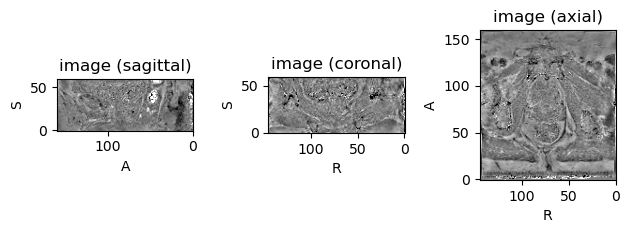

In [ ]:
subject.plot()

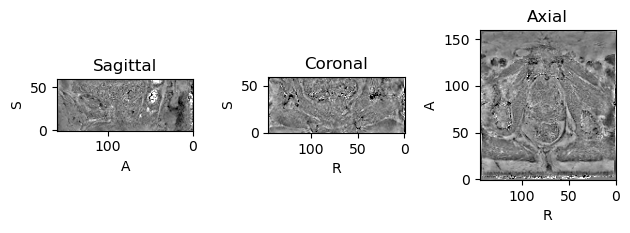

In [ ]:
dorescale(subject['qsm']).plot()

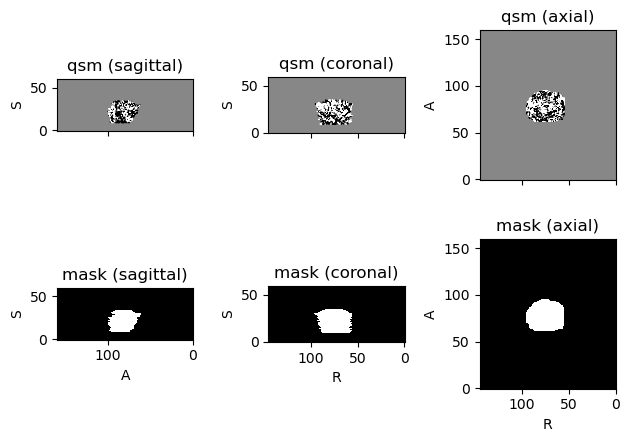

In [ ]:
domask(subject).plot()